In [2]:
import numpy as np
from matplotlib import pyplot as plt
import glob
import climtools_lib as ctl
import xarray as xr

%matplotlib inline

libgfortran.so.3: cannot open shared object file: No such file or directory
No DISPLAY variable set. Switching to agg backend


In [3]:
cart = '/nas/archive_CMIP6/CMIP6/model-output/EC-Earth-Consortium/EC-Earth3/ssp585/atmos/Amon/r4i1p1f1/rlut/'

pino = xr.open_mfdataset(cart + 'rlut*nc')

In [5]:
pino_mean = pino.mean('time')

Adding cyclic point



<GeoAxesSubplot:>

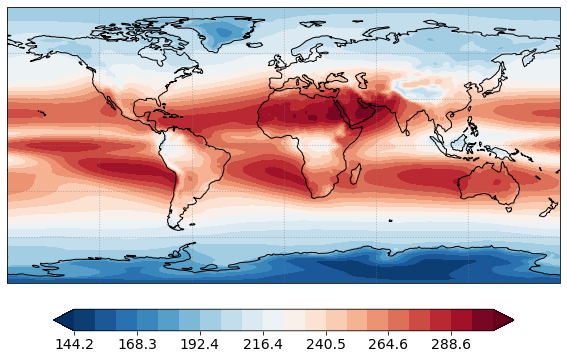

In [7]:
ctl.plot_map_contour(pino_mean['rlut'])

In [8]:
pino_clim = pino.groupby('time.month').mean()

In [11]:
pino_clim = pino_clim.compute()

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point

Adding cyclic point



[<Figure size 1080x864 with 13 Axes>]

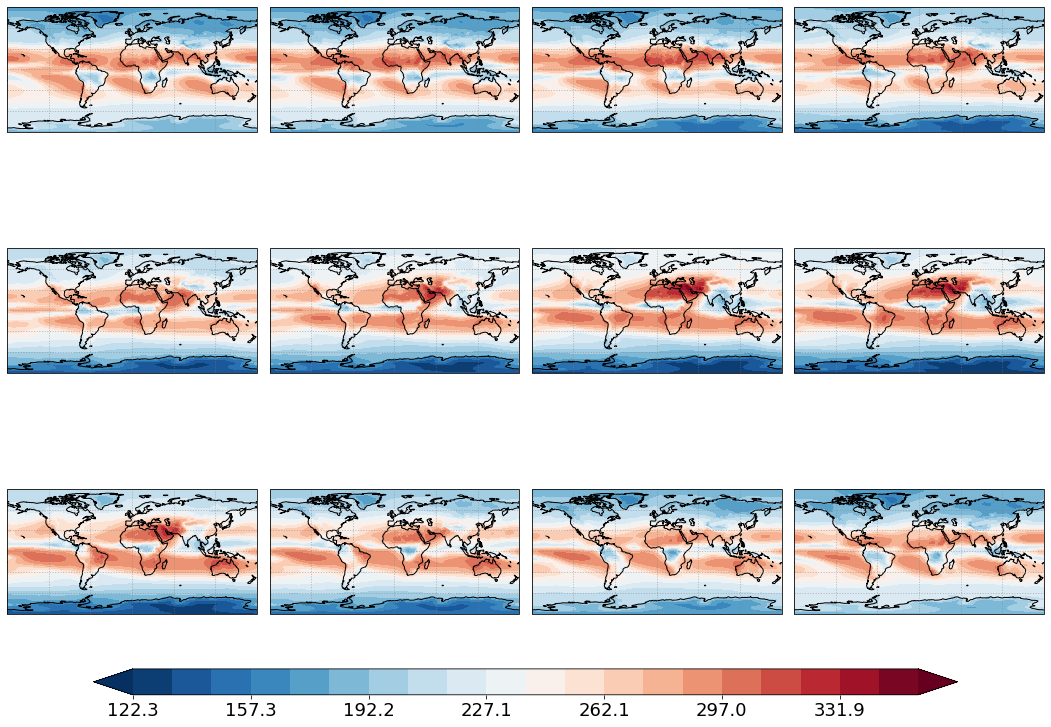

In [10]:
ctl.plot_multimap_contour(pino_clim['rlut'])

In [14]:
gigi = ctl.global_mean(pino_mean['rlut']).compute()

In [15]:
gigi

<xarray.DataArray 'rlut' ()>
array(242.3733762)

In [2]:
# cart = '/data-hobbes/fabiano/ERA5_last/'
# fil = cart + 'ERA5_zg500_NDJFM_2021_r25.nc'
fil = '/nas/reference/ERA5/daily/zg500_1940-2023/ERA5_zg500_1940-2023_r25_m.nc'

In [3]:
pino = xr.open_dataset(fil)['z']
pino_clim = pino.rolling(time=20,center=True).mean().groupby('time.dayofyear').mean('time')
pino_anom = pino.groupby('time.dayofyear')-pino_clim

In [5]:
gigi = pino.rolling(time=20, center=True).mean()

In [15]:
gigi_ok = gigi.sel(lat = slice(55, 60), lon = slice(-20, 0))
pino_orig = pino.sel(lat = slice(55, 60), lon = slice(-20, 0))
pino_ok = pino_clim.sel(lat = slice(55, 60), lon = slice(-20, 0))
plt.plot(pino_old[0][:, 0,0])

print(gigi_ok.min(), gigi_ok.max())

print(pino_ok.min(), pino_ok.max())



<xarray.DataArray 'z' ()>
array(5115.13227186) <xarray.DataArray 'z' ()>
array(5826.17606023)
<xarray.DataArray 'z' ()>
array(5343.82737652) <xarray.DataArray 'z' ()>
array(5663.25792381)


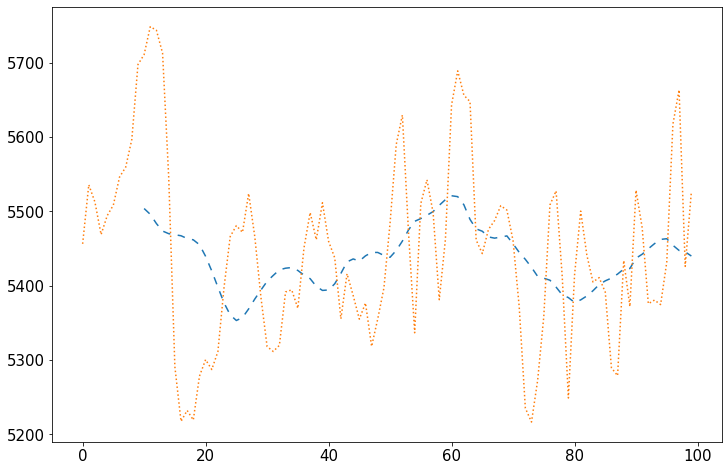

In [17]:
plt.figure(figsize=(12,8))

plt.plot(gigi_ok[:100, 0, 0], ls = '--')
plt.plot(pino_orig[:100, 0, 0], ls = ':')

In [46]:
pino_old = ctl.daily_climatology(pino_orig.values, pino_orig.time.to_pandas(), window=20)

### confronto ciclo stagionale xarray (blue) vs mio (orange)

l'ultimo punto di xarray (dayofyear 366) è la media del 31 dicembre degli anni bisestili.. da lì nasce la discontinuità

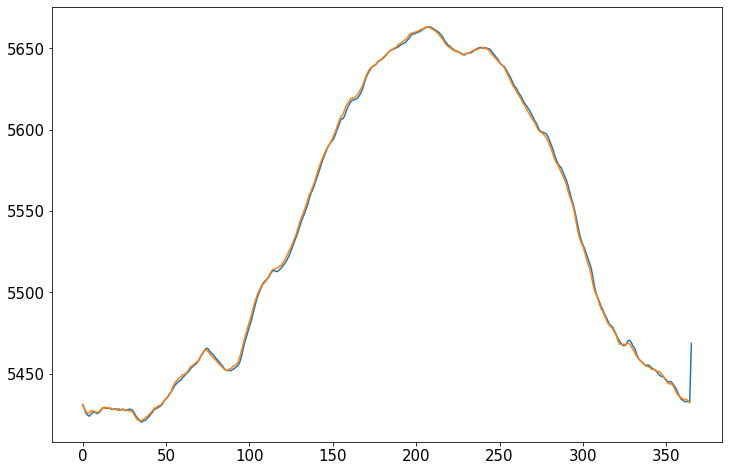

In [54]:

plt.figure(figsize=(12, 8))
plt.plot(pino_ok[:, 0, 0])
plt.plot(pino_old[0][:, 0,0])


In [23]:
campo = pino_anom.sel(time = '2023-05-16')

6370999.999999996
Adding cyclic point



<GeoAxesSubplot:title={'center':'16 mag 2023'}>

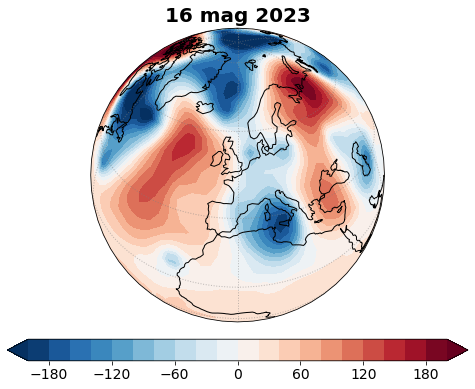

In [26]:
ctl.plot_map_contour(campo, visualization='nearside', central_lat_lon=(50, 0), bounding_lat= -10, plot_anomalies = True, cbar_range=(-200, 200), title = '16 mag 2023')

In [5]:
pippo = pino.mean('time')
anom = pino - pippo

In [60]:
pino.lon

<xarray.DataArray 'lon' (lon: 144)>
array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,  22.5,
        25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,  45. ,  47.5,
        50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,  67.5,  70. ,  72.5,
        75. ,  77.5,  80. ,  82.5,  85. ,  87.5,  90. ,  92.5,  95. ,  97.5,
       100. , 102.5, 105. , 107.5, 110. , 112.5, 115. , 117.5, 120. , 122.5,
       125. , 127.5, 130. , 132.5, 135. , 137.5, 140. , 142.5, 145. , 147.5,
       150. , 152.5, 155. , 157.5, 160. , 162.5, 165. , 167.5, 170. , 172.5,
       175. , 177.5, 180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5,
       200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. , 247.5,
       250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5, 270. , 272.5,
       275. , 277.5, 280. , 282.5, 285. , 287.5, 290. , 292.5, 295. , 297.5,
       300. , 302.5, 305. , 307.5, 310. , 312.5, 315. , 317.5, 320. , 322.5,
       325. , 327.5, 330. , 332.5, 335. , 337.5, 340. , 342.5, 345. , 347.5,
       350. , 352.5, 355. , 357.5])
Coordinates:
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X

In [69]:
pinorot = pino.assign_coords(lon = (pino.lon + 180) % 360 - 180).roll(lon = len(pino.lon)//2, roll_coords=True)

pino_sel = pino.assign_coords(lon = (pino.lon + 180) % 360 - 180).sel(lon = slice(-40, 40))
pinorot_sel = pinorot.sel(lon = slice(-40, 40))

In [70]:
pinorot_sel

<xarray.DataArray 'z' (time: 30481, lat: 73, lon: 33)>
array([[[5116.584005  , 5116.584005  , 5116.584005  , ...,
         5116.584005  , 5116.584005  , 5116.584005  ],
        [5093.99201028, 5093.70451936, 5093.4649436 , ...,
         5101.10741052, 5101.63447721, 5102.13758632],
        [5083.11527051, 5082.56424625, 5081.94134926, ...,
         5105.41977431, 5106.59369556, 5107.69574408],
        ...,
        [5226.40553604, 5223.74624504, 5221.30257223, ...,
         5179.54451625, 5179.47264352, 5179.78409202],
        [5295.23565356, 5292.98364136, 5290.80350189, ...,
         5260.54508267, 5260.71278571, 5260.9284039 ],
        [5323.74516969, 5323.74516969, 5323.74516969, ...,
         5323.74516969, 5323.74516969, 5323.74516969]],

       [[5099.33454986, 5099.33454986, 5099.33454986, ...,
         5099.33454986, 5099.33454986, 5099.33454986],
        [5077.72481578, 5077.65294305, 5077.65294305, ...,
         5095.0940588 , 5095.88465883, 5096.6273437 ],
        [5067.18348209, 5067.01577905, 5066.70433055, ...,
         5102.64069543, 5104.9166652 , 5107.00097436],
...
        [5264.63263451, 5266.1159918 , 5267.73218706, ...,
         5279.37764878, 5281.37021827, 5283.93841895],
        [5263.12713755, 5264.34481891, 5265.58463993, ...,
         5293.98982508, 5294.58759593, 5295.14108745],
        [5264.49979654, 5264.49979654, 5264.49979654, ...,
         5264.49979654, 5264.49979654, 5264.49979654]],

       [[5205.40904116, 5205.40904116, 5205.40904116, ...,
         5205.40904116, 5205.40904116, 5205.40904116],
        [5223.96207713, 5225.66683103, 5227.34944527, ...,
         5255.95388737, 5255.99816669, 5255.99816669],
        [5227.01735036, 5229.12061816, 5231.22388596, ...,
         5277.25224131, 5277.38507928, 5277.45149826],
        ...,
        [5306.96366646, 5305.61314714, 5304.26262781, ...,
         5307.11864409, 5307.91567189, 5309.15549291],
        [5334.4611255 , 5334.37256686, 5334.28400821, ...,
         5335.43527059, 5336.14373974, 5336.87434856],
        [5356.04729504, 5356.04729504, 5356.04729504, ...,
         5356.04729504, 5356.04729504, 5356.04729504]]])
Coordinates:
  * time     (time) datetime64[ns] 1940-01-01 1940-01-02 ... 2023-06-14
  * lon      (lon) float64 -40.0 -37.5 -35.0 -32.5 -30.0 ... 32.5 35.0 37.5 40.0
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
Attributes:
    standard_name:  geopotential
    long_name:      Geopotential
    units:          m

In [6]:
pino.sel(lat = slice(20., 40.), lon = slice(10, 50))

<xarray.Dataset>
Dimensions:  (time: 240, lon: 17, lat: 9, expver: 2)
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01T12:00:00 ... 2022-03-30T12:00:00
  * lon      (lon) float64 10.0 12.5 15.0 17.5 20.0 ... 40.0 42.5 45.0 47.5 50.0
  * lat      (lat) float64 20.0 22.5 25.0 27.5 30.0 32.5 35.0 37.5 40.0
  * expver   (expver) float64 1.0 5.0
Data variables:
    z        (time, expver, lat, lon) float32 5.713e+04 5.718e+04 ... 5.59e+04
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Tue Apr 05 11:11:23 2022: cdo remapbil,r144x73 ERA5_zg500_N...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [7]:
pino['z'].values.shape

(240, 2, 73, 144)

In [8]:
gino = pino.sel(expver = 1.0).mean('time')

In [9]:
%matplotlib inline

In [10]:
gino = gino['z']

In [13]:
gino

<xarray.DataArray 'z' (lat: 73, lon: 144)>
array([[49399.234, 49399.234, 49399.234, ..., 49399.234, 49399.234,
        49399.234],
       [49429.17 , 49436.66 , 49444.145, ..., 49407.977, 49414.89 ,
        49421.906],
       [49426.23 , 49441.8  , 49458.824, ..., 49382.312, 49395.58 ,
        49410.902],
       ...,
       [50454.664, 50453.01 , 50453.08 , ..., 50456.133, 50454.42 ,
        50456.03 ],
       [50423.47 , 50423.984, 50424.38 , ..., 50421.004, 50421.82 ,
        50422.68 ],
       [50425.273, 50425.273, 50425.273, ..., 50425.273, 50425.273,
        50425.273]], dtype=float32)
Coordinates:
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
    expver   float64 1.0

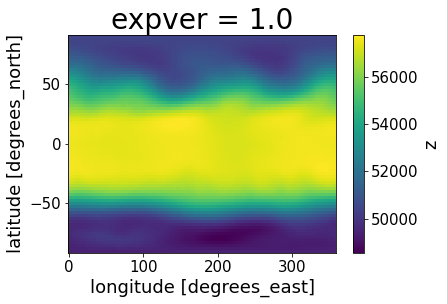

In [11]:
gino.plot()

Adding cyclic point



<GeoAxesSubplot:>

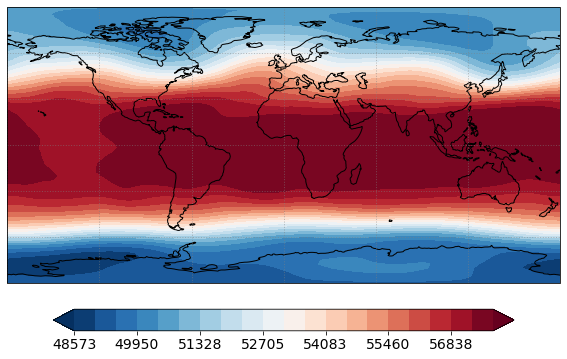

In [12]:
ctl.plot_map_contour(gino)

In [20]:
gino_g = ctl.global_mean(gino)

In [21]:
gino_g

<xarray.DataArray 'z' ()>
array(55397.24241994)
Coordinates:
    expver   float64 1.0

In [22]:
gino.to_netcdf(cart + 'out.nc')

In [24]:
np.any(np.isnan(gino))

<xarray.DataArray 'z' ()>
array(False)
Coordinates:
    expver   float64 1.0

In [2]:
cart = '/home/fabiano/Research/lavori/WeatherRegimes/ERA5/'

In [3]:
resu, resu1 = ctl.load_wrtool(cart + 'out_ERA5_NDJFM_EAT_4clus_4pcs_1979-2019.p')

In [7]:
piu = resu1['dates'][0]
piu.strftime()[:10], piu.year, piu.month, piu.day

In [70]:
len(resu1['labels'])/150

39.32666666666667

<BarContainer object of 39 artists>

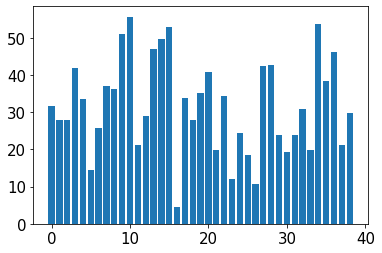

In [71]:
yea = np.arange(len(resu1['freq_clus_seasonal'][0]))
plt.bar(yea, resu1['freq_clus_seasonal'][0])

12256557.833439022


[<Figure size 1080x864 with 5 Axes>]

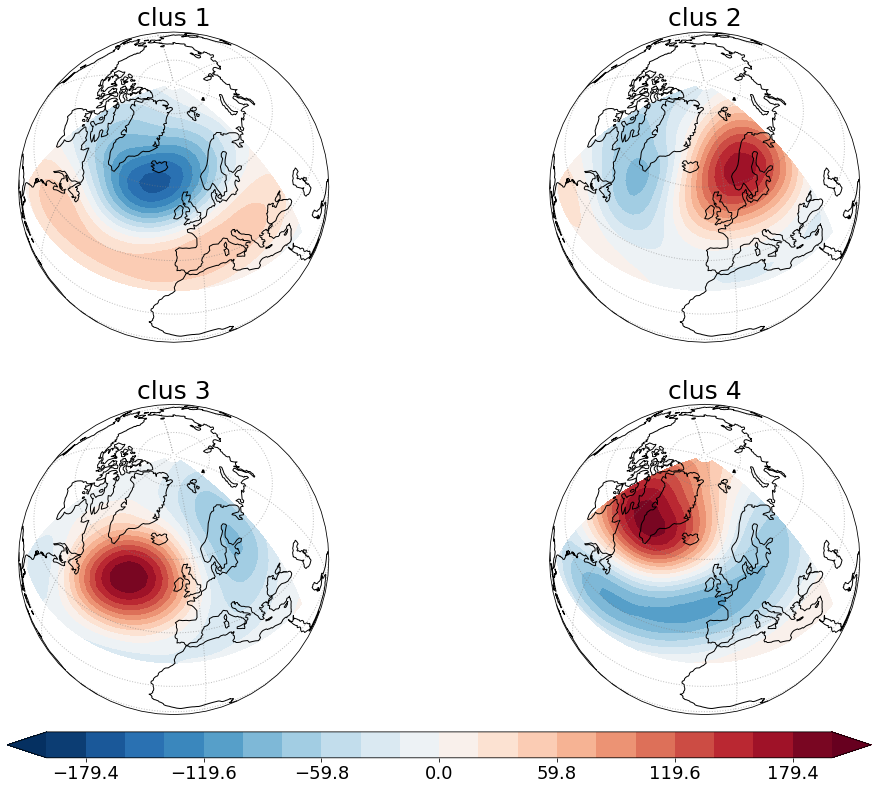

In [72]:
ctl.plot_multimap_contour(resu1['cluspattern_area'], resu1['lat_area'], resu1['lon_area'], plot_anomalies=True, subtitles = ['clus {}'.format(i) for i in range(1,5)], visualization='nearside', central_lat_lon=(60,-10), bounding_lat=-10)

### Read results from CMIP6 regimes paper

In [28]:
filo = '/data-hobbes/fabiano/WR_CMIP6/out_NEW_cmip6_ssp585_NDJFM_EAT_4clus_4pcs_2015-2100_refCLUS_dtr_histrebase.p'

resu, resu_ref = ctl.load_wrtool(filo)

In [15]:
resu_ref.keys()

dict_keys(['var_ratio', 'freq_clus', 'cluspattern', 'cluspattern_area', 'lat', 'lat_area', 'lon', 'lon_area', 'labels', 'centroids', 'dist_centroid', 'pcs', 'eff_centroids', 'eofs_ref_pcs', 'model_eofs', 'model_eofs_eigenvalues', 'model_eofs_varfrac', 'resid_times', 'trans_matrix', 'dates', 'regime_transition_pcs', 'var_area', 'var_glob', 'solver', 'dates_allyear', 'time_cal', 'time_units', 'monthly_freq'])

In [39]:
solver = resu_ref['solver']

In [18]:
resu_ref['var_area'].shape

(7550, 24, 48)

In [29]:
eofs = resu_ref['eofs_ref_pcs']
varfrac = resu_ref['model_eofs_varfrac']

In [37]:
eofs[0].shape

24*48*0.55

633.6

array([0.19110488, 0.3261883 , 0.4496593 , 0.53385433])

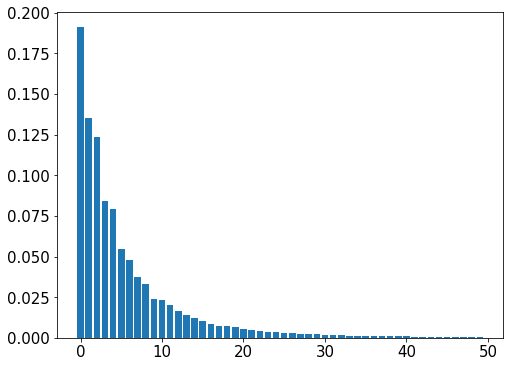

In [52]:
plt.figure(figsize=(8,6))
plt.bar(np.arange(50), solver.varianceFraction()[:50])

np.cumsum(solver.varianceFraction()[:4])

12256557.833439022


[<Figure size 1080x864 with 5 Axes>]

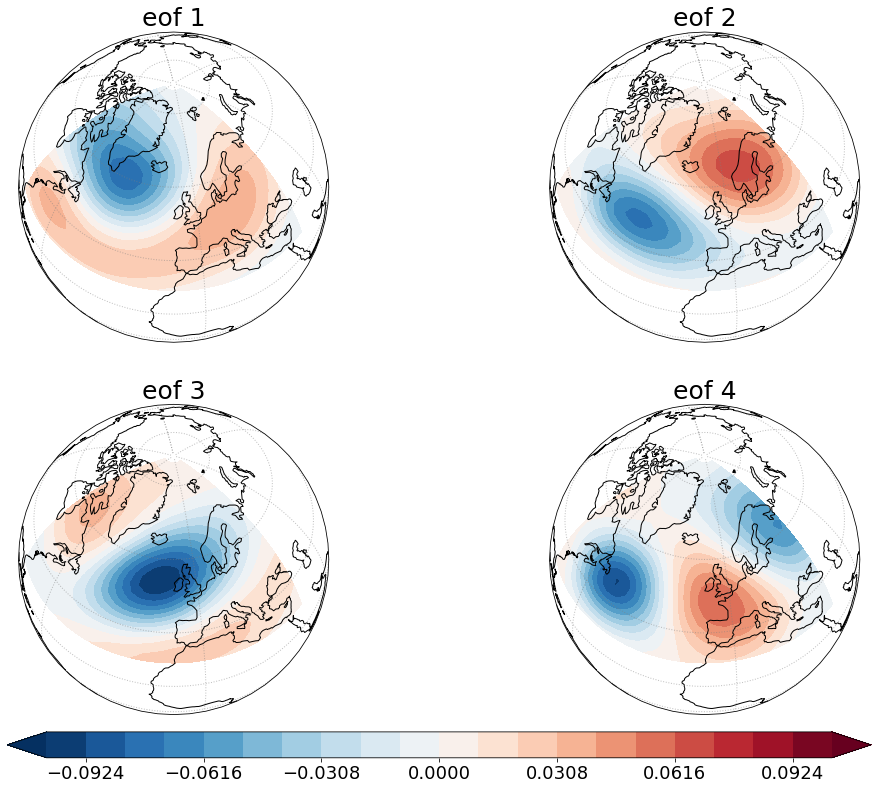

In [35]:
ctl.plot_multimap_contour(eofs, resu_ref['lat_area'], resu_ref['lon_area'], plot_anomalies=True, subtitles = ['eof {}'.format(i) for i in range(1,5)], visualization='nearside', central_lat_lon=(60,-10), bounding_lat=-10)

12256557.833439022


[<Figure size 1080x864 with 5 Axes>]

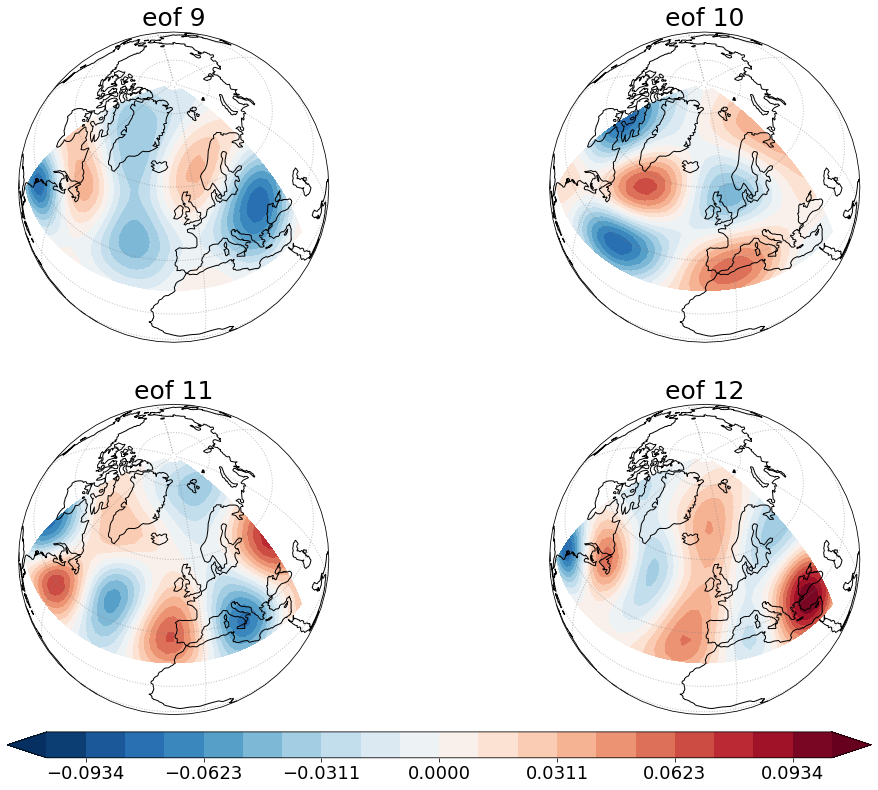

In [54]:
ctl.plot_multimap_contour(solver.eofs()[8:12], resu_ref['lat_area'], resu_ref['lon_area'], plot_anomalies=True, subtitles = ['eof {}'.format(i) for i in range(9,13)], visualization='nearside', central_lat_lon=(60,-10), bounding_lat=-10)

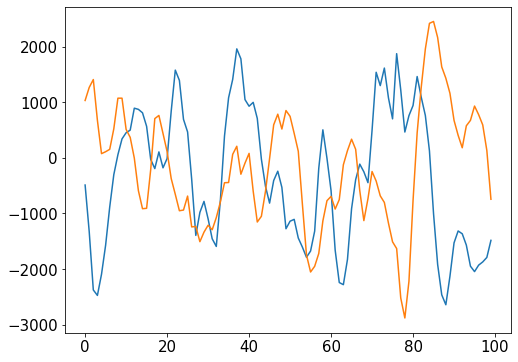

In [62]:
plt.figure(figsize=(8,6))
plt.plot(resu_ref['pcs'][:100, :2])

In [11]:
resu_ok = dict()
resu_ok['centroids'] = resu_ref['centroids']
resu_ok['eofs_ref_pcs'] = resu_ref['eofs_ref_pcs']

import pickle
pickle.dump(resu_ok, open('/data-hobbes/fabiano/WR_CMIP6/reference_dtr_histrebase.p', 'wb'))

In [14]:
import numpy as np
np.all(resu_ref['eofs_ref_pcs'] == resu_ref['model_eofs'])

True

In [24]:
resu['EC-Earth3_r1i1p1f1'].keys()

dict_keys(['var_ratio', 'RMS', 'patcor', 'freq_clus', 'cluspattern', 'cluspattern_area', 'lat', 'lat_area', 'lon', 'lon_area', 'labels', 'centroids', 'dist_centroid', 'pcs', 'climate_mean', 'climate_mean_dates', 'eff_centroids', 'eofs_ref_pcs', 'model_eofs', 'model_eofs_eigenvalues', 'model_eofs_varfrac', 'resid_times', 'trans_matrix', 'dates'])

In [1]:
tos = xr.open_mfdataset('/nas/BOTTINO/CMIP6/LongRunMIP/EC-Earth-Consortium/EC-Earth3/historical/r4i1p1f1/Omon/tos/tos*nc')

NameError: name 'xr' is not defined

In [4]:
lats = np.linspace(-89.5, 89.5, 180)
lons = np.linspace(0, 359, 360)
tos_rg = ctl.regrid_dataset(tos, lats, lons)

Regridding...
Regridding completed in 0:00:08.736418


In [6]:
tos_rg = tos_rg.compute()

In [10]:
%matplotlib inline

Adding cyclic point



<GeoAxesSubplot:>

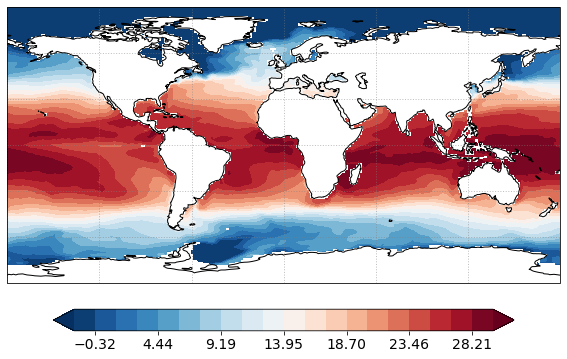

In [11]:
ctl.plot_map_contour(tos_rg['tos'][0])

In [13]:
tos_rg = tos_rg.drop_vars(['vertices_latitude', 'vertices_longitude'])

In [15]:
tos_rg.to_netcdf('/nas/BOTTINO/CMIP6/LongRunMIP/EC-Earth-Consortium/EC-Earth3/historical/r4i1p1f1/Omon/tos_rg_1850-2014.nc')

In [4]:
tos_rg = xr.open_dataset('/nas/BOTTINO/CMIP6/LongRunMIP/EC-Earth-Consortium/EC-Earth3/historical/r4i1p1f1/Omon/tos_rg_1850-2014.nc')

In [5]:
tos_rg

<xarray.Dataset>
Dimensions:  (time: 1980, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    tos      (time, lat, lon) float32 ...
Attributes:
    regrid_method:  bilinear

In [9]:
anom = tos_rg.groupby('time.month') - tos_rg.groupby('time.month').mean('time')

In [11]:
import scipy

In [15]:
tos_rg_dtr = scipy.signal.detrend(tos_rg['tos'].sel(lat = slice(-5,5), lon = slice(190,240)), axis = 0)

In [19]:
tos_rg_dtr = xr.DataArray(tos_rg_dtr, coords = {'time' = tos_rg.time, 'lat': tos_rg.lat, 'lon': tos_rg.lon})

SyntaxError: invalid syntax (3967511115.py, line 1)

In [1]:
coords = {'time': tos_rg.time, 'lat': tos_rg.lat, 'lon': tos_rg.lon}

NameError: name 'tos_rg' is not defined